# What is the difference in life expectancy between developed and developing countries?
Arial Chen\ Emily Ahn\ Karina Jhingan\ Zhekai Zhu

# Introduction
A country's developed/developing status is mainly based on GDP and living standards. To look at an example of how a country's status may affect its life expectancy: Ethiopia (a developing country) and the United States (a developed country). By comparing the living standards between Ethiopia and the US, Freeman (2020) finds out that the latter has longer life expectancy due to various factors like community-based health strategies, improving access to safe water, female education and gender empowerment, and so on. There is another view that deems that with the improvement of modern technology, the impact on mortality has been overstated for earlier periods (Preston, 1975). This raises the question, is there a difference in life expectancy between developed and developing countries, if so is it significant? The random variable is life expectancy, the location parameter is mean, and the scale parameter is interquartile range. Our population is all countries in the past century(1922-2022), our dataset, provided by the WHO, contains annual data observations from 2000-2015 of 193 countries. Each observation contains information on the country and year as well as socioeconomic (government spending, GDP, schooling, alcohol use) and health (BMI, immunizations, diseases) factors.

# Preliminary Results

In [1]:
#Package needed in the proposal

library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#Loading data from the Internet

life_expectancy_df <- read.csv(file = 'https://raw.githubusercontent.com/eahn01/stat201-group25/main/data/life-expectancy.csv')

#Overview of the dataframe

head(life_expectancy_df)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


#### Clean and wrangle data
The original data frame is in tidy format, so we only need to select the relevant columns, which are country, year, status, life expectancy. Then, we also remove the N\A values since N\A values are useless in statistical inference.

In [3]:
# Dataframe of developing countries and developed countries, with columns needed, N/A removed.

life <- life_expectancy_df%>%
                 filter(!is.na(Life.expectancy))%>%
                 filter(!is.na(BMI))%>%
                 select(Country,Year,Status, Life.expectancy)

#Add a new column indicating the bmi level (3 levels: low, standard, high)

#### Final dataframe

In [4]:
#Overview of the dataframe

head(life)

#Number of rows

nrow(life)

,Country,Year,Status,Life.expectancy
,<chr>,<int>,<chr>,<dbl>
1,Afghanistan,2015,Developing,65.0
2,Afghanistan,2014,Developing,59.9
3,Afghanistan,2013,Developing,59.9
4,Afghanistan,2012,Developing,59.5
5,Afghanistan,2011,Developing,59.2
6,Afghanistan,2010,Developing,58.8


[1] 2896

#### Visualization of data
In this part, we visualized relevant statistics. We used histograms to show the distribution of our data and box plots to show the difference between life expectancies based on the status of a country.

In [5]:
# The configurations of plots

options(repr.plot.width = 15, repr.plot.height = 8.5)

plot_config1 <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      legend.position="none",
                      panel.spacing = unit(50, "lines"),
                      strip.text.x = element_text(size = 8),
                      panel.spacing.x = unit(50, "cm"),
                      text = element_text(size = 20))

for_loop_function_each_year <- c("2000", "2001", "2002", "2003", "2004","2005","2006","2007","2008","2009","2010")

year_labels_for_each_years<-c("2000", "2001", "2002", "2003", "2004","2005","2006","2007","2008","2009","2010")
                      
boxplot_scale <- scale_y_continuous(breaks = seq(0, 100, 10))

bmi_labels <- scale_x_discrete(labels = c("low", "mid","high"))

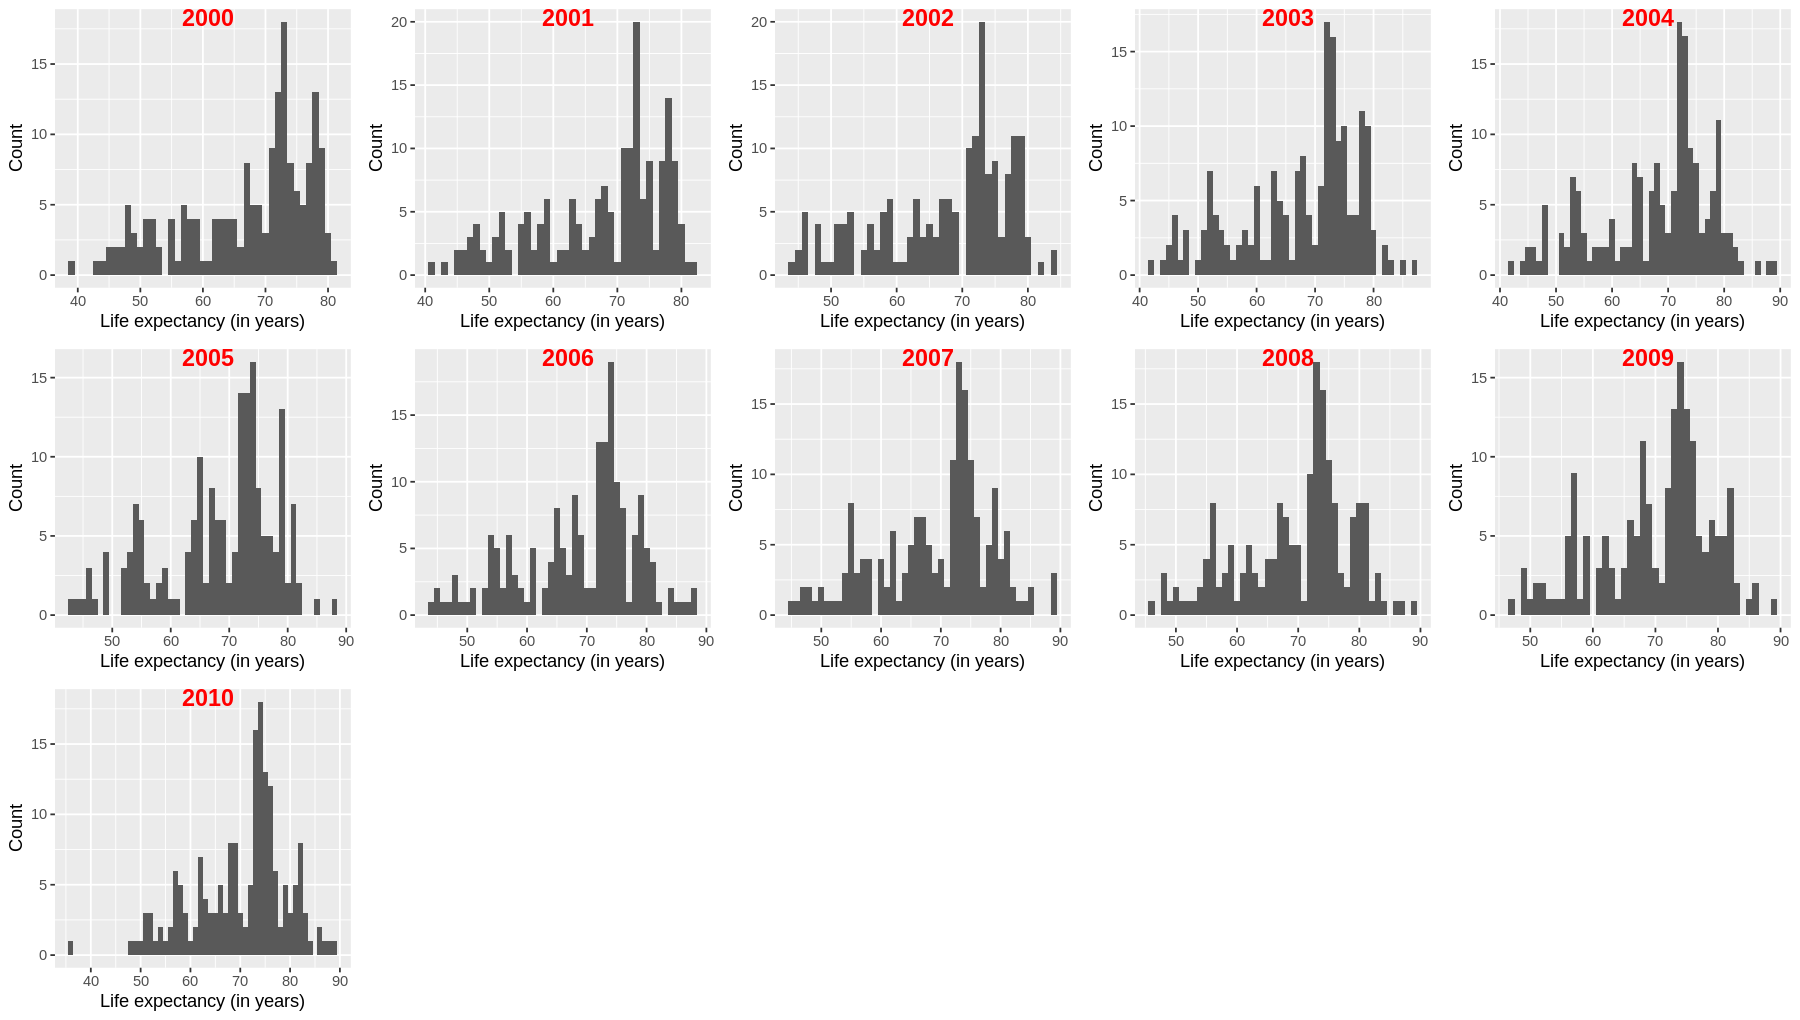

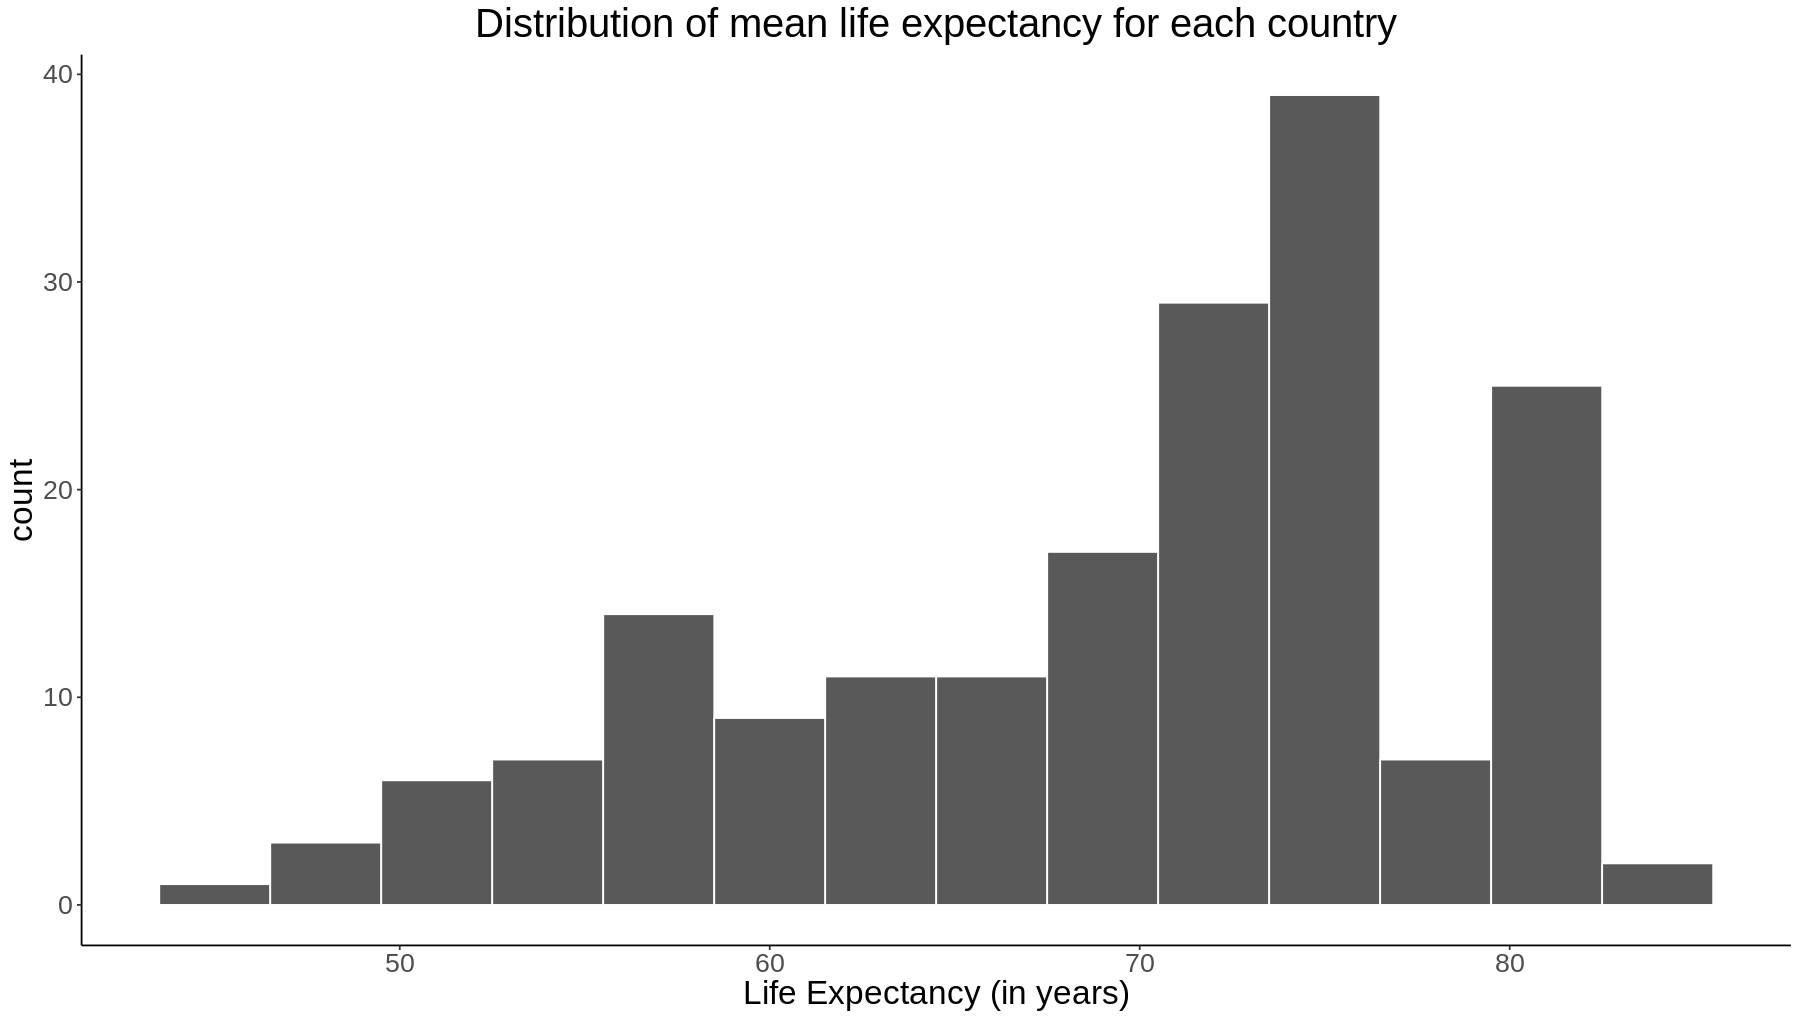

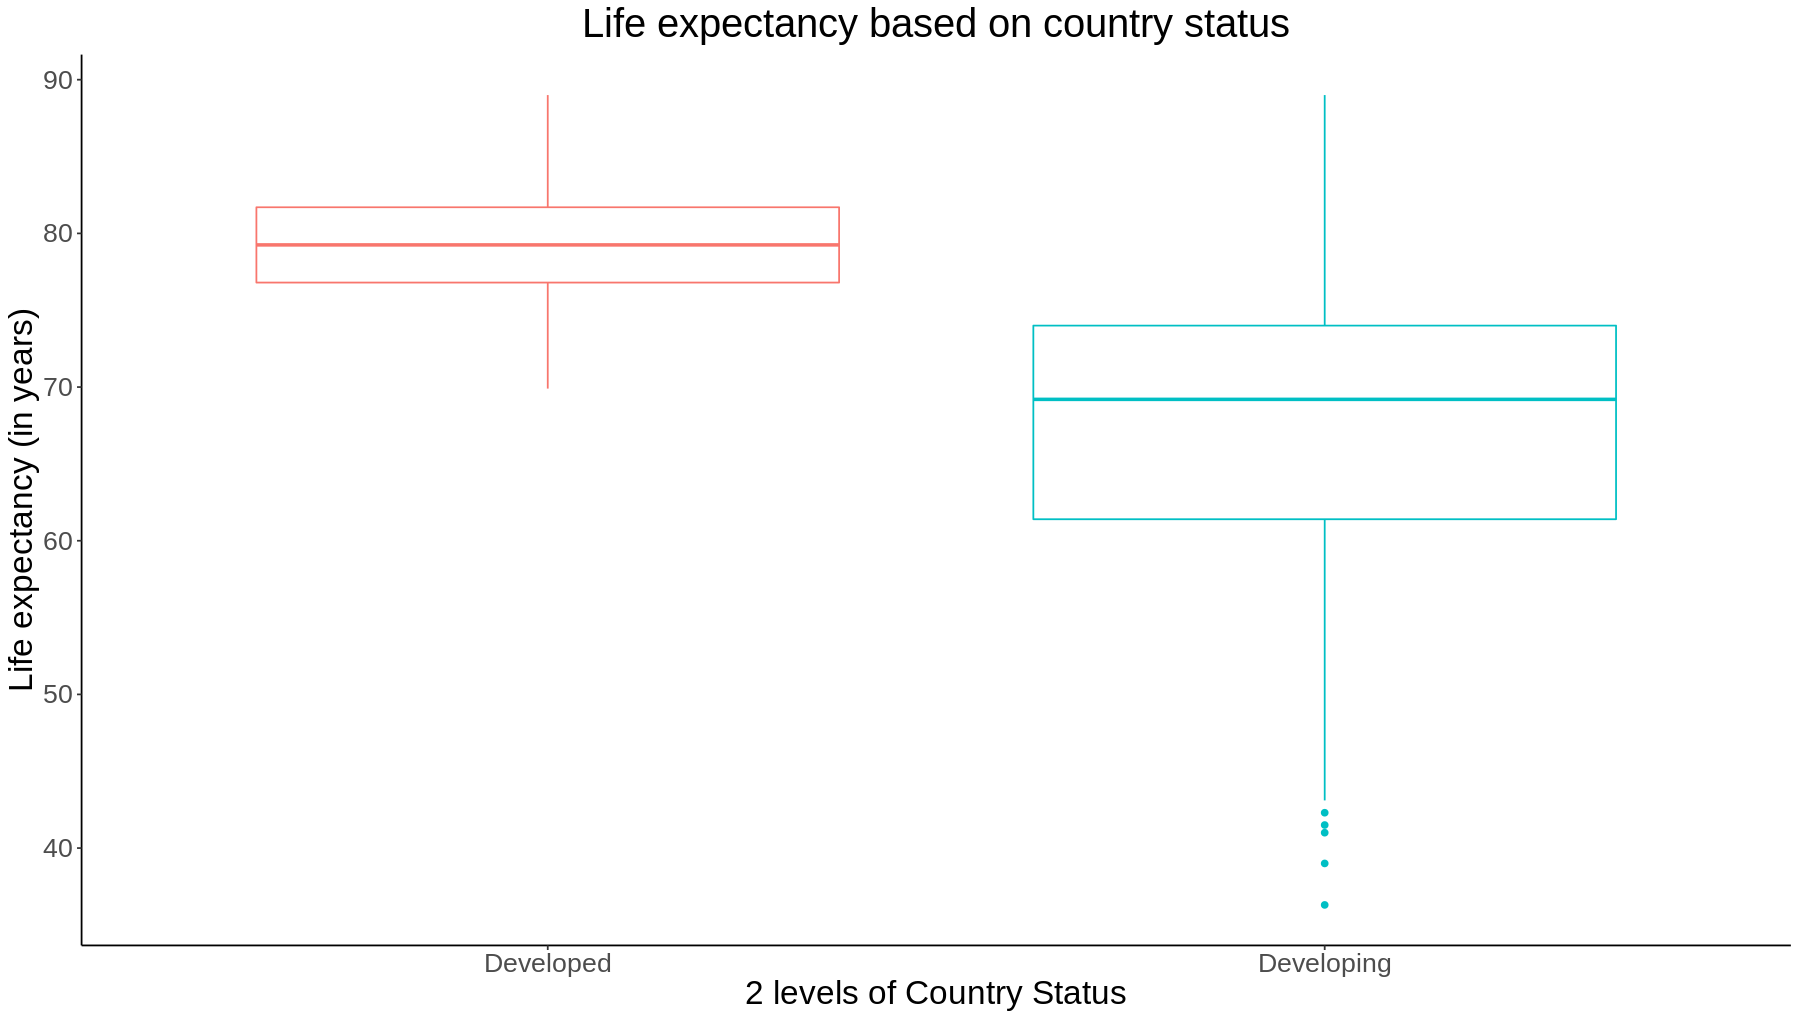

In [6]:
#Life expectancy distribution for all countries in each year

plot_each_year <- function(i)
  {plot<-
       life %>%
       filter(Year == for_loop_function_each_year[i])%>%
       ggplot(aes(x = Life.expectancy)) +
       geom_histogram(binwidth = 1) +
       xlab("Life expectancy (in years)") +
       ylab("Count") 
  
  return(plot)}

P2000<-plot_each_year(1)
P2001<-plot_each_year(2)
P2002<-plot_each_year(3)
P2003<-plot_each_year(4)
P2004<-plot_each_year(5)
P2005<-plot_each_year(6)
P2006<-plot_each_year(7)
P2007<-plot_each_year(8)
P2008<-plot_each_year(9)
P2009<-plot_each_year(10)
P2010<-plot_each_year(11)

plot_grid(P2000,P2001,P2002,P2003,P2004,P2005,P2006,P2007,P2008,P2009,P2010,ncol=5,labels=year_labels_for_each_years,hjust=-3.5,label_colour = "red")

#Life expectancy distribution for all countries in all years

All_countries_dis <- life %>% 
    group_by(Country) %>% 
    summarize(mean_life_expectancy = mean(Life.expectancy)) %>% 
        ggplot(aes(x = mean_life_expectancy)) +
        geom_histogram(binwidth = 3, colour = "white") +
        xlab("Life Expectancy (in years)") +
        ggtitle("Distribution of mean life expectancy for each country")+
        plot_config1

All_countries_dis

#Boxtplot for 2 country status

Boxplot_Country_Status <- life %>%
    ggplot(aes(x = Status, y = Life.expectancy, color = Status)) +
    geom_boxplot() +
    xlab("2 levels of Country Status") +
    ylab("Life expectancy (in years)") +
    ggtitle("Life expectancy based on country status") +
    plot_config1 +
    boxplot_scale

Boxplot_Country_Status

#### Statistics of Dataset

In [7]:
#Mean and standard deviation of life expectancy for developing countries and developed countries

STAT_Country_Status<- life %>%
    group_by(Status) %>%
    summarise(mean_life = mean(Life.expectancy),
              sd_life = sd(Life.expectancy))

STAT_Country_Status

Status,mean_life,sd_life
<chr>,<dbl>,<dbl>
Developed,79.19785,3.930942
Developing,67.23578,8.985598


# Method: Plan
The integrity of our data can be supported by the following facts: our data covers a significant period of time (15 years), was collected fairly recently, and comes from a respected organization (World Health Organization). On the other hand, our results don’t take into account measurement error, variance in how the data was collected, how the definition of a developed/developing country might change over time, and how socioeconomic inequalities can worsen or lessen over time. And also, we are navigating the population for the 20 century. Our current preliminary findings are not sufficient to deliver to a stakeholder because our results don’t take into account sampling variability and this is especially important to take into account as the boxplot visual in our graph “Life Expectancy based on Country Status” displays that there is a significant overlap between the two ranges so it’s extremely important to conduct hypothesis testing and bootstrapping to verify that our results are as precise as possible. We are expecting to find the life expectancy in developed countries to be greater than in developing countries. Our findings would indicate a level of correlation between the condition of the national economy and lifespan. A later study could look into what the differences are between developing countries and developed countries that lead to different lifespans, and how these factors affect the length of life.

# References
Freeman, T., Gesesew, H. A., Bambra, C., Giugliani, E. R. J., Popay, J., Sanders, D., ... & Baum, F. (2020). Why do some countries do better or worse in life expectancy relative to income? An analysis of Brazil, Ethiopia, and the United States of America. International journal for equity in health, 19(1), 1-19.

Preston, S. H. (1975). The changing relation between mortality and level of economic development. Population studies, 29(2), 231-248.

W.H.O (2018, February 10). Life expectancy (WHO). Kaggle. Retrieved July 26, 2022, from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who